# Connecting to MongoDB

In [1]:
import pymongo
from pymongo import MongoClient
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Local host
cluster = MongoClient("mongodb://localhost:27017/?readPreference=primary&appname=MongoDB%20Compass&directConnection=true&ssl=false")

In [3]:
# Connect to database2
db = cluster["database2"]

In [4]:
# Work with Amazon collection
collection = db["Amazon"]

In [92]:
# Assign dataframe to all the data in Amazon collection
import pandas as pd
df = pd.DataFrame(collection.find())

# Data Exploratory and Data Preprocessing

In [93]:
df.head()

,_id,,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,60eca3c94d530690eb41d84a,0,5,4,True,"11 6, 2013",A3U4E9PIZ8OWH1,449819906,{'Format:': ' Kindle Edition'},Shirley Curtis,I've read this book already and I've got plans...,A WONDERFUL BOOK,1383696000,
1,60eca3c94d530690eb41d84b,7,5,,True,"11 29, 2016",A1IQJ7PGO9I4MI,449819906,{'Format:': ' Kindle Edition'},GPS,"This book is a most have, if you are serious a...",Magnificent,1480377600,
2,60eca3c94d530690eb41d84c,6,5,,True,"12 23, 2016",A1GJKG5OAQQ69,449819906,{'Format:': ' Kindle Edition'},Kindle Customer,The best knitting instruction book I own in m...,Thank you for the best knitting book I have i...,1482451200,
3,60eca3c94d530690eb41d84d,4,5,,True,"01 12, 2017",A2846L8Q507JC4,449819906,{'Format:': ' Kindle Edition'},Dulce,"A gazillion pattern stitches, lucidly explaine...","Extremely clear, thorough",1484179200,
4,60eca3c94d530690eb41d84e,5,2,,True,"01 6, 2017",A3V21ZT37Y242L,449819906,{'Format:': ' Kindle Edition'},Sheila Fenchak,Just ok. Read better knit books.,Just ok,1483660800,


In [94]:
df.shape

(2875917, 14)

In [95]:
# Checking if we can use overall as the target variable
df.overall.value_counts()

5    1984651
4     361840
1     210232
3     198200
2     120994
Name: overall, dtype: int64

In [96]:
# Check if there's any nulls
df.isnull().sum()

_id                 0
                    0
overall             0
vote                0
verified            0
reviewTime          0
reviewerID          0
asin                0
style               0
reviewerName      326
reviewText          0
summary             0
unixReviewTime      0
image               0
dtype: int64

In [97]:
# Checking how many reviews are in each item
df.asin.value_counts()

B004AKS59O    4534
B0014DGXU8    4006
B000Y00DDK    3862
B00172XBQA    3860
B00122CN64    3772
              ... 
B00IOOTY06       1
B005POIINM       1
B016N3HDW0       1
B00IEJY1GI       1
B010C21BY4       1
Name: asin, Length: 302809, dtype: int64

In [98]:
# Removing rows that have only 100 value count in their asin since we have more than 2 mil rows
df = df.groupby('asin').filter(lambda x : len(x) > 100)
df.asin.value_counts()

B004AKS59O    4534
B0014DGXU8    4006
B000Y00DDK    3862
B00172XBQA    3860
B00122CN64    3772
              ... 
B00IRHP8A0     101
B00DV94JXG     101
B007JL37I0     101
B00X55WCXU     101
B00KJNUI3W     101
Name: asin, Length: 4544, dtype: int64

In [99]:
# Checking the length and still have over a million of rows
len(df)

1282703

In [100]:
df.head()

,_id,,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
242,60eca3c94d530690eb41d93c,242,5,44,True,"06 26, 2007",A2YJ0QZF5CQ2X4,823013626,{'Format:': ' Paperback'},Cindy,"I've loved Donna Kato's work for some time, bu...",Wow! What a resource!,1182816000,
243,60eca3c94d530690eb41d93d,243,5,,True,"08 16, 2015",A3K068L50RQXCC,823013626,{'Format:': ' Paperback'},Carol P,Absolutely fantastic book. If I could give it...,Essential reading,1439683200,
244,60eca3c94d530690eb41d93e,244,5,,True,"07 28, 2015",A2NMB9ID620BHK,823013626,{'Format:': ' Paperback'},Mrs. Eve Smith,Exciting and inspirational! Great information.,Great information.,1438041600,
245,60eca3c94d530690eb41d93f,245,5,,True,"07 23, 2015",A24GSIBPJNJWEF,823013626,{'Format:': ' Paperback'},William V Harrold,very good,Five Stars,1437609600,
246,60eca3c94d530690eb41d940,246,5,2,True,"07 3, 2015",A3LAFC1BW6N4N2,823013626,{'Format:': ' Paperback'},Susan L,I just received Donna Kato's Creative Surface ...,Never enough hours in a day for these beautifu...,1435881600,


In [101]:
# Remove rows that verified is FALSE because the reviews are not verified
df = df[df.verified == "True"]
df.shape

(1191326, 14)

In [102]:
# Replacing all blank with NaN values
import numpy as np
df.replace("", np.nan, inplace = True)
df.head()

,_id,,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
242,60eca3c94d530690eb41d93c,242,5,44,True,"06 26, 2007",A2YJ0QZF5CQ2X4,823013626,{'Format:': ' Paperback'},Cindy,"I've loved Donna Kato's work for some time, bu...",Wow! What a resource!,1182816000,NaN
243,60eca3c94d530690eb41d93d,243,5,NaN,True,"08 16, 2015",A3K068L50RQXCC,823013626,{'Format:': ' Paperback'},Carol P,Absolutely fantastic book. If I could give it...,Essential reading,1439683200,NaN
244,60eca3c94d530690eb41d93e,244,5,NaN,True,"07 28, 2015",A2NMB9ID620BHK,823013626,{'Format:': ' Paperback'},Mrs. Eve Smith,Exciting and inspirational! Great information.,Great information.,1438041600,NaN
245,60eca3c94d530690eb41d93f,245,5,NaN,True,"07 23, 2015",A24GSIBPJNJWEF,823013626,{'Format:': ' Paperback'},William V Harrold,very good,Five Stars,1437609600,NaN
246,60eca3c94d530690eb41d940,246,5,2,True,"07 3, 2015",A3LAFC1BW6N4N2,823013626,{'Format:': ' Paperback'},Susan L,I just received Donna Kato's Creative Surface ...,Never enough hours in a day for these beautifu...,1435881600,NaN


In [103]:
# Checking for na values again
df.isnull().sum()

_id                     0
                        0
overall                 0
vote              1051047
verified                0
reviewTime              0
reviewerID              0
asin                    0
style              491364
reviewerName          213
reviewText            977
summary               367
unixReviewTime          0
image             1160148
dtype: int64

In [104]:
# Choosing only overall and review text column
df = df[["overall", "reviewText"]]
df.head()

,overall,reviewText
242,5,"I've loved Donna Kato's work for some time, bu..."
243,5,Absolutely fantastic book. If I could give it...
244,5,Exciting and inspirational! Great information.
245,5,very good
246,5,I just received Donna Kato's Creative Surface ...


In [105]:
# Checking if there's any nulls still
df.isnull().sum()

overall         0
reviewText    977
dtype: int64

In [106]:
# Dropping the rows with NA values since reviewText is an important variable
df.dropna(inplace = True)
df.isnull().sum()

overall       0
reviewText    0
dtype: int64

In [107]:
# Checking the shape of dataframe
df.shape

(1190349, 2)

In [108]:
# Change 1-2 to negative, 3 to neutral, and 4-5 to positive for overall column
df.overall.mask(df.overall == 1, "negative", inplace = True)
df.overall.mask(df.overall == 2, "negative", inplace = True)
df.overall.mask(df.overall == 3, "neutral", inplace = True)
df.overall.mask(df.overall == 4, "positive", inplace = True)
df.overall.mask(df.overall == 5, "positive", inplace = True)
df.head()

,overall,reviewText
242,positive,"I've loved Donna Kato's work for some time, bu..."
243,positive,Absolutely fantastic book. If I could give it...
244,positive,Exciting and inspirational! Great information.
245,positive,very good
246,positive,I just received Donna Kato's Creative Surface ...


In [109]:
# Creating length of words column
df["length"] = df["reviewText"].str.split().str.len()

In [110]:
# Checking why there's null values in the length
row_has_NaN = df.isnull().any(axis=1)
df[row_has_NaN]
# It seems like the length of NaN means that the reviews aren't words

,overall,reviewText,length
50582,positive,1,NaN
50737,positive,1,NaN
108437,positive,1,NaN
125948,positive,1,NaN
128244,positive,1,NaN
...,...,...,...
1685641,positive,1,NaN
1872640,positive,1,NaN
1968848,positive,1,NaN
1986641,positive,1,NaN


In [111]:
# Because those reviews are not text, will get rid of those rows so we could turn the length column into integer
df.dropna(inplace = True)
df.isnull().sum()

overall       0
reviewText    0
length        0
dtype: int64

In [112]:
# Change to integer
df.length = df.length.astype("int")

In [113]:
# Create number of punc column
import string
count = lambda l1, l2: sum([1 for x in l1 if x in l2])

df["punct"] = df.reviewText.apply(lambda y: count(y, string.punctuation))
df.head()

,overall,reviewText,length,punct
242,positive,"I've loved Donna Kato's work for some time, bu...",110,26
243,positive,Absolutely fantastic book. If I could give it...,12,3
244,positive,Exciting and inspirational! Great information.,5,2
245,positive,very good,2,0
246,positive,I just received Donna Kato's Creative Surface ...,121,12


In [114]:
# check for space i.e. any blank message
blanks = []

for idx, label, review, length, punct in df.itertuples():
    if review.isspace():
        blanks.append(i)
blanks

# Since there isn't any blank messages, we can continue to the next step

[]

In [115]:
# Remove HTML code artifacts
from bs4 import BeautifulSoup

df['reviewText'] = [BeautifulSoup(text).get_text() for text in df['reviewText']]
df.head()

,overall,reviewText,length,punct
242,positive,"I've loved Donna Kato's work for some time, bu...",110,26
243,positive,Absolutely fantastic book. If I could give it...,12,3
244,positive,Exciting and inspirational! Great information.,5,2
245,positive,very good,2,0
246,positive,I just received Donna Kato's Creative Surface ...,121,12


In [116]:
# Remove non letters
df['reviewText'] = df.reviewText.str.replace('[^a-zA-Z]', ' ')
df.head()

,overall,reviewText,length,punct
242,positive,I ve loved Donna Kato s work for some time bu...,110,26
243,positive,Absolutely fantastic book If I could give it...,12,3
244,positive,Exciting and inspirational Great information,5,2
245,positive,very good,2,0
246,positive,I just received Donna Kato s Creative Surface ...,121,12


In [117]:
# Remove punctuations from the reviews
df["reviewText"] = df['reviewText'].str.replace('[^\w\s]','')
df.head()

,overall,reviewText,length,punct
242,positive,I ve loved Donna Kato s work for some time bu...,110,26
243,positive,Absolutely fantastic book If I could give it...,12,3
244,positive,Exciting and inspirational Great information,5,2
245,positive,very good,2,0
246,positive,I just received Donna Kato s Creative Surface ...,121,12


In [118]:
# Turn everything lower case for reviews
df.reviewText = df.reviewText.str.lower()
df.head()

,overall,reviewText,length,punct
242,positive,i ve loved donna kato s work for some time bu...,110,26
243,positive,absolutely fantastic book if i could give it...,12,3
244,positive,exciting and inspirational great information,5,2
245,positive,very good,2,0
246,positive,i just received donna kato s creative surface ...,121,12


In [119]:
# Checking what are stop words
from nltk.corpus import stopwords
stop = stopwords.words("english")
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [120]:
# Removing stop words
df.reviewText = df.reviewText.apply(lambda x: " ".join([word for word in x.split() if word not in (stop)]))
df.head()

,overall,reviewText,length,punct
242,positive,loved donna kato work time purchased several p...,110,26
243,positive,absolutely fantastic book could give stars would,12,3
244,positive,exciting inspirational great information,5,2
245,positive,good,2,0
246,positive,received donna kato creative surface effects b...,121,12


In [121]:
# Import the stop words csv file that I created from the website
# https://www.ranks.nl/stopwords

stop = pd.read_csv("stop_words.csv", header = None)
stop.head()

,0
0,a
1,able
2,about
3,above
4,abst


In [122]:
# Turn it into a list
stop = [x for x in stop[0]]

# Removing stop words again
df.reviewText = df.reviewText.apply(lambda x: " ".join([word for word in x.split() if word not in (stop)]))
df.head()

,overall,reviewText,length,punct
242,positive,loved donna kato work time purchased polymer c...,110,26
243,positive,absolutely fantastic book stars,12,3
244,positive,exciting inspirational great,5,2
245,positive,good,2,0
246,positive,received donna kato creative surface effects b...,121,12


In [123]:
df.reviewText[242]

'loved donna kato work time purchased polymer clay books years working pc ms kato books purchased received today read cover cover hands itching techniques generously painstakingly shares leading polymer clay artists sell techniques individually seminars expensive dvds ms kato demonstrated processes hungry learn place beautiful inexpensive written book hats donna kato'

In [124]:
# Making a copy of the data frame so we can test one with lemmatization and one without
# Lemmatizing means to assign the base form of words. This will help turn all the text into its base words so we won't
# duplicate the same words. For example: shop, shopping, shopped
df2 = df.copy()

In [125]:
# Lemmatize the copied dataframe with PorterStemmer
import nltk

lm = nltk.PorterStemmer()

In [126]:
# Create a function for PorterStemmer
def lemmatize_txt(text):
    word_list = nltk.word_tokenize(text)
    
    lm_output = " ".join([lm.stem(x) for x in word_list])
    return lm_output

# Lemmatize the reviews
df2.reviewText = df.reviewText.apply(lemmatize_txt)
df2.head()

,overall,reviewText,length,punct
242,positive,love donna kato work time purchas polym clay b...,110,26
243,positive,absolut fantast book star,12,3
244,positive,excit inspir great,5,2
245,positive,good,2,0
246,positive,receiv donna kato creativ surfac effect book a...,121,12


In [127]:
# Making another copy of the data frame
lm2 = nltk.stem.WordNetLemmatizer()

df3 = df.copy()

# Create a function for WordNetLemmatizer
def lemmatize_txt2(text):
    word_list = nltk.word_tokenize(text)
    
    lm_output = " ".join([lm2.lemmatize(x) for x in word_list])
    return lm_output

# Lemmatize the reviews
df3.reviewText = df3.reviewText.apply(lemmatize_txt2)
df3.head()

,overall,reviewText,length,punct
242,positive,loved donna kato work time purchased polymer c...,110,26
243,positive,absolutely fantastic book star,12,3
244,positive,exciting inspirational great,5,2
245,positive,good,2,0
246,positive,received donna kato creative surface effect bo...,121,12


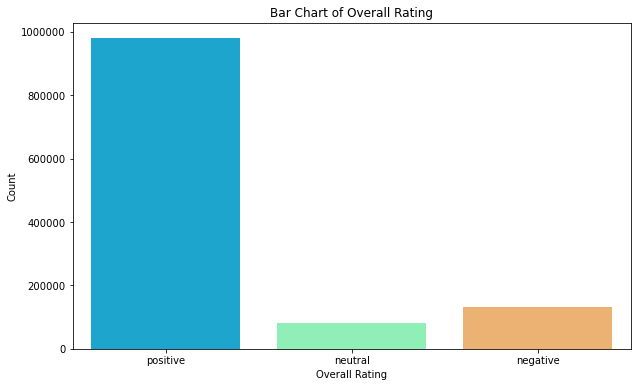

In [128]:
# Time to create graphs with the original dataframe
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10, 6))
ax.ticklabel_format(useOffset = False, style = "plain")
sns.countplot(df.overall, palette = "rainbow")
plt.xlabel("Overall Rating")
plt.ylabel("Count")
plt.title("Bar Chart of Overall Rating");

# This bar graph shows that there are more positive reviews than neutral and negative. It also shows that there's definitely an
# imbalance with the overall rating. 

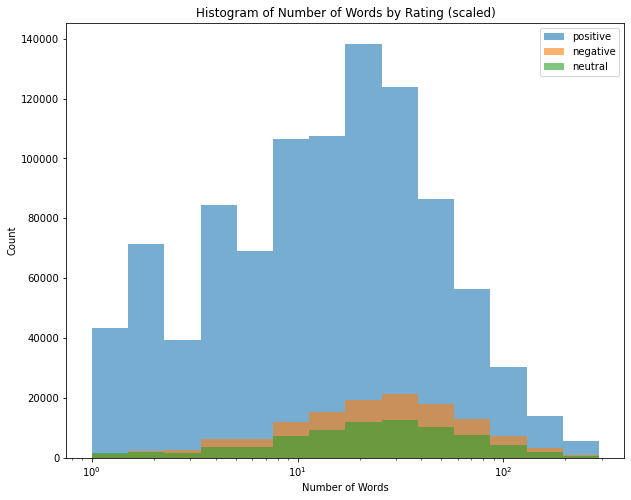

In [99]:
# Creating histogram with the length of words, scaling the x by log so it would respond to skewness towards large values
# (which  one or a few points are much larger than the majority of the data)
plt.figure(figsize = (10,8))
plt.xscale("log")
bins = 1.5 ** (np.arange(0,15))
plt.hist(df[df.overall == "positive"]["length"], bins = bins, alpha = .6)
plt.hist(df[df.overall == "negative"]["length"], bins = bins, alpha = .6)
plt.hist(df[df.overall == "neutral"]["length"], bins = bins, alpha = .6)
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.title("Histogram of Number of Words by Rating (scaled)")
plt.legend(("positive", "negative", "neutral"))
plt.show();

# Since there's not that much difference between number of words between the ratings,
# it might not be impactful to predictions

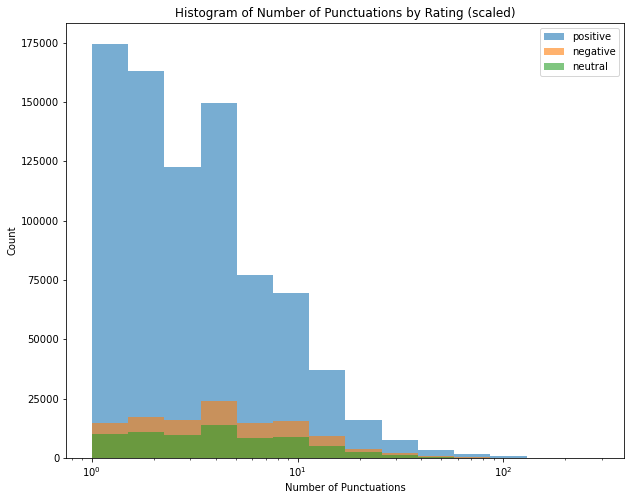

In [100]:
# Creating a graph with number of punctuations, scaling x by log
plt.figure(figsize = (10,8))
plt.xscale("log")
bins = 1.5 ** (np.arange(0,15))
plt.hist(df[df.overall == "positive"]["punct"], bins = bins, alpha = .6)
plt.hist(df[df.overall == "negative"]["punct"], bins = bins, alpha = .6)
plt.hist(df[df.overall == "neutral"]["punct"], bins = bins, alpha = .6)
plt.xlabel("Number of Punctuations")
plt.ylabel("Count")
plt.title("Histogram of Number of Punctuations by Rating (scaled)")
plt.legend(("positive", "negative", "neutral"))
plt.show();

# This histogram shows the positive reviews will have less number of punctuations compared to the neutral and negative reviews

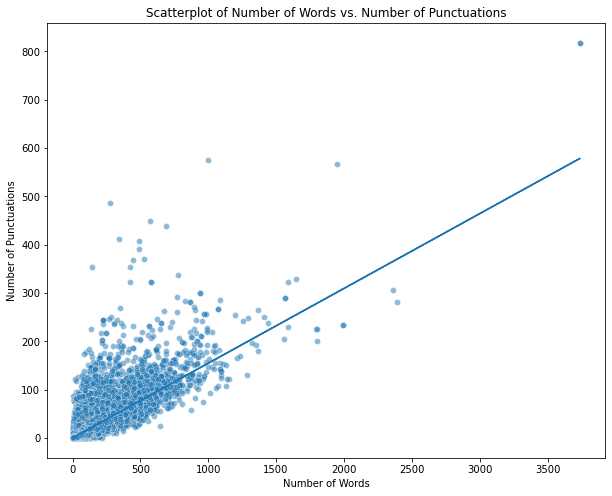

In [101]:
# Getting the scatterplot between the number of words and number of punctuations
plt.figure(figsize = (10, 8))
sns.scatterplot(x = "length", y = "punct", data = df, alpha = .5)
m, b = np.polyfit(df.length, df.punct, 1)
plt.plot(df.length, m * df.length + b)
plt.xlabel("Number of Words")
plt.ylabel("Number of Punctuations")
plt.title("Scatterplot of Number of Words vs. Number of Punctuations");

# As expected, there is a positive correlation between the number of words and number of punctuations. If we are writing a 
# long review with lots of sentences, there will be lots of punctuations

In [102]:
df.overall.value_counts()

positive    979620
negative    130437
neutral      80227
Name: overall, dtype: int64

# Word Cloud

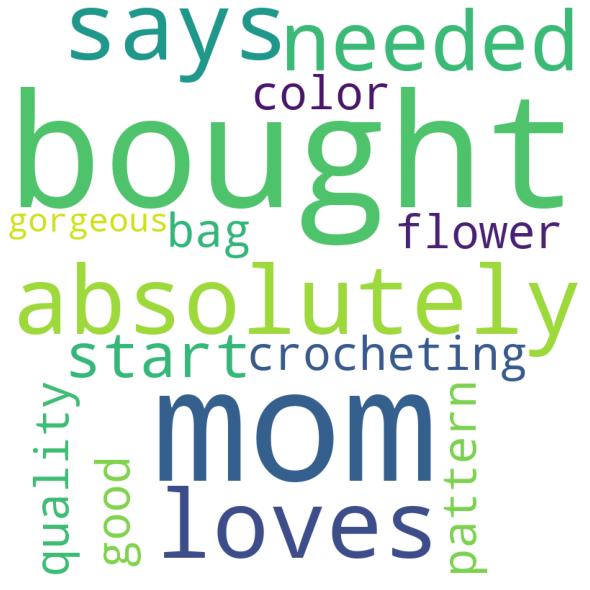

In [256]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

comment_words = " "
stopwords = set(STOPWORDS)

# iterate through reviews
for val in df.reviewText:
    # Turn each review to string in case if it's not string
    val = str(val)
    
    # split the value
    tokens = val.split()
    
# Converts each token to lowercase
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
    
for words in tokens:    
    comment_words = comment_words + words + " "
    
wordcloud = WordCloud(width = 800,
                     height = 800,
                     background_color = "white",
                     stopwords = stopwords,
                     min_font_size = 1).generate(comment_words)

# Plot the wordcloud image
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Partition the Data

In [129]:
from sklearn.model_selection import train_test_split

# Try this with original data
X1 = df.reviewText
y1 = df.overall

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, 
                                                        y1, 
                                                        test_size = 0.1, 
                                                        stratify = y1, 
                                                        random_state = 42)

In [130]:
# Try this with Porter Stemmer data
X2 = df2.reviewText
y2 = df2.overall

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.1, stratify = y2, random_state = 42)

In [131]:
# Try this with Word Net Lemmatizer data
X3 = df3.reviewText
y3 = df3.overall

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.1, stratify = y3, random_state = 42)

# Building Pipeline for both TfidfVectorizer and Classifier

In [132]:
# Use the pipeline and fit the training data to the model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

# min df = 2 means a word must occur in at least 2 documents from the corpus
# max df = .98 means ignore words that occur in more than 98% of the documents from the corpus
text_svc1 = Pipeline([("tfidf", TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english")),
                     ("clf", LinearSVC())])
text_svc2 = Pipeline([("tfidf", TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english")),
                     ("clf", LinearSVC())])
text_svc3 = Pipeline([("tfidf", TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english")),
                     ("clf", LinearSVC())])

text_svc1.fit(X1_train, y1_train)
text_svc2.fit(X2_train, y2_train)
text_svc3.fit(X3_train, y3_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.98, min_df=2, stop_words='english')),
                ('clf', LinearSVC())])

In [133]:
# Form a prediction set
pred1 = text_svc1.predict(X1_test)
pred2 = text_svc1.predict(X2_test)
pred3 = text_svc1.predict(X3_test)

In [134]:
# Check the confusion matrix and the classification reports
from sklearn.metrics import confusion_matrix, classification_report

# With original data
print(confusion_matrix(y1_test, pred1))
print(classification_report(y1_test, pred1))

[[ 8124   202  4718]
 [ 1725   353  5945]
 [ 1554   219 96189]]
              precision    recall  f1-score   support

    negative       0.71      0.62      0.66     13044
     neutral       0.46      0.04      0.08      8023
    positive       0.90      0.98      0.94     97962

    accuracy                           0.88    119029
   macro avg       0.69      0.55      0.56    119029
weighted avg       0.85      0.88      0.85    119029



In [135]:
# Next Porter Stemmer
print(confusion_matrix(y2_test, pred2))
print(classification_report(y2_test, pred2))

[[ 5448   212  7384]
 [ 1398   273  6352]
 [ 3357   462 94143]]
              precision    recall  f1-score   support

    negative       0.53      0.42      0.47     13044
     neutral       0.29      0.03      0.06      8023
    positive       0.87      0.96      0.91     97962

    accuracy                           0.84    119029
   macro avg       0.56      0.47      0.48    119029
weighted avg       0.80      0.84      0.81    119029



In [136]:
# Lastly Word Net Lemmatizer
print(confusion_matrix(y3_test, pred3))
print(classification_report(y3_test, pred3))

[[ 8204   196  4644]
 [ 1925   329  5769]
 [ 2404   241 95317]]
              precision    recall  f1-score   support

    negative       0.65      0.63      0.64     13044
     neutral       0.43      0.04      0.07      8023
    positive       0.90      0.97      0.94     97962

    accuracy                           0.87    119029
   macro avg       0.66      0.55      0.55    119029
weighted avg       0.84      0.87      0.85    119029



## Undersampling

In [137]:
# Using undersampling with the majority class where it under samples the majority class (positive) then fit it to the model
# using LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler

model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english"),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "majority"),
                      LinearSVC())

model.fit(X1_train, y1_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='majority')),
                ('linearsvc', LinearSVC())])

In [138]:
# Make predictions
y_pred = model.predict(X1_test)

In [139]:
# Saving the model
import pickle as p

filename = "rus_svc.sav"

p.dump(model, open(filename, "wb"))

In [140]:
# Print confusion matrix
print(confusion_matrix(y1_test, y_pred))

[[10865  1481   698]
 [ 3417  3187  1419]
 [11733 11484 74745]]


In [141]:
# Print classification report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

    negative       0.42      0.83      0.56     13044
     neutral       0.20      0.40      0.26      8023
    positive       0.97      0.76      0.86     97962

    accuracy                           0.75    119029
   macro avg       0.53      0.66      0.56    119029
weighted avg       0.86      0.75      0.78    119029



In [142]:
# Trying this with sampling strategy of not minority meaning it will resample all classes but the minority class (neutral)
# then fit the model
model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english"),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "not minority"),
                      LinearSVC())

model.fit(X1_train, y1_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='not minority')),
                ('linearsvc', LinearSVC())])

In [143]:
# Make predictions
y_pred = model.predict(X1_test)

In [144]:
# Print confusion matrix
print(confusion_matrix(y1_test, y_pred))

[[ 9177  2993   874]
 [ 2053  4434  1536]
 [ 5725 16158 76079]]


In [145]:
# Print classification report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

    negative       0.54      0.70      0.61     13044
     neutral       0.19      0.55      0.28      8023
    positive       0.97      0.78      0.86     97962

    accuracy                           0.75    119029
   macro avg       0.57      0.68      0.58    119029
weighted avg       0.87      0.75      0.80    119029



In [146]:
# Add n-gram to range (1,2) bigram
model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english", ngram_range = (1,2)),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "not minority"),
                      LinearSVC())

model.fit(X1_train, y1_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, ngram_range=(1, 2),
                                 stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='not minority')),
                ('linearsvc', LinearSVC())])

In [147]:
# Make predictions
y_pred = model.predict(X1_test)

In [148]:
# Print confusion matrix
print(confusion_matrix(y1_test, y_pred))

[[ 9325  2910   809]
 [ 1803  4897  1323]
 [ 5217 15597 77148]]


In [149]:
# Print classification report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

    negative       0.57      0.71      0.63     13044
     neutral       0.21      0.61      0.31      8023
    positive       0.97      0.79      0.87     97962

    accuracy                           0.77    119029
   macro avg       0.58      0.70      0.61    119029
weighted avg       0.88      0.77      0.81    119029



In [150]:
# Add n-gram to range (1,3) trigram
model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english", ngram_range = (1,3)),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "not minority"),
                      LinearSVC())

model.fit(X1_train, y1_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, ngram_range=(1, 3),
                                 stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='not minority')),
                ('linearsvc', LinearSVC())])

In [151]:
# Make predictions
y_pred = model.predict(X1_test)

In [152]:
# Print confusion matrix
print(confusion_matrix(y1_test, y_pred))

[[ 9425  2737   882]
 [ 1815  4695  1513]
 [ 5169 13729 79064]]


In [153]:
# Print classification report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

    negative       0.57      0.72      0.64     13044
     neutral       0.22      0.59      0.32      8023
    positive       0.97      0.81      0.88     97962

    accuracy                           0.78    119029
   macro avg       0.59      0.70      0.61    119029
weighted avg       0.88      0.78      0.82    119029



In [154]:
# Add n-gram to range (1,4) qualgram
model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english", ngram_range = (1,4)),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "not minority"),
                      LinearSVC())

model.fit(X1_train, y1_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, ngram_range=(1, 4),
                                 stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='not minority')),
                ('linearsvc', LinearSVC())])

In [155]:
# Make predictions
y_pred = model.predict(X1_test)

In [156]:
# Print confusion matrix
print(confusion_matrix(y1_test, y_pred))

[[ 9433  2727   884]
 [ 1806  4719  1498]
 [ 5172 13791 78999]]


In [157]:
# Print classification report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

    negative       0.57      0.72      0.64     13044
     neutral       0.22      0.59      0.32      8023
    positive       0.97      0.81      0.88     97962

    accuracy                           0.78    119029
   macro avg       0.59      0.71      0.61    119029
weighted avg       0.88      0.78      0.82    119029



In [158]:
# Add n-gram to range (1,5) Not sure what it's called after qualgram
model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english", ngram_range = (1,5)),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "not minority"),
                      LinearSVC())

model.fit(X1_train, y1_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, ngram_range=(1, 5),
                                 stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='not minority')),
                ('linearsvc', LinearSVC())])

In [159]:
# Make predictions
y_pred = model.predict(X1_test)

In [160]:
# Print confusion matrix
print(confusion_matrix(y1_test, y_pred))

[[ 9428  2738   878]
 [ 1811  4721  1491]
 [ 5179 13841 78942]]


In [161]:
# Print classification report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

    negative       0.57      0.72      0.64     13044
     neutral       0.22      0.59      0.32      8023
    positive       0.97      0.81      0.88     97962

    accuracy                           0.78    119029
   macro avg       0.59      0.71      0.61    119029
weighted avg       0.88      0.78      0.82    119029



In [162]:
y_pred

array(['positive', 'neutral', 'positive', ..., 'positive', 'positive',
       'negative'], dtype=object)

In [72]:
# Save model
filename = "rus_svc_ngram.sav"

p.dump(model, open(filename, "wb"))

In [163]:
# Save model in h5
filename = "rus_svc_ngram.h5"

p.dump(model, open(filename, "wb"))

In [217]:
# Combine under sampling and over sampling
from imblearn.over_sampling import RandomOverSampler
model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english"),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "not minority"),
                      RandomOverSampler(random_state = 42, sampling_strategy = "not majority"),
                      LinearSVC())

model.fit(X1_train, y1_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='not minority')),
                ('randomoversampler',
                 RandomOverSampler(random_state=42,
                                   sampling_strategy='not majority')),
                ('linearsvc', LinearSVC())])

In [218]:
# Make predictions
y_pred = model.predict(X1_test)

In [219]:
# Print confusion matrix
print(confusion_matrix(y1_test, y_pred))

[[ 9272  2939   833]
 [ 2019  4479  1525]
 [ 5500 15189 77273]]


In [220]:
# Print classification report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

    negative       0.55      0.71      0.62     13044
     neutral       0.20      0.56      0.29      8023
    positive       0.97      0.79      0.87     97962

    accuracy                           0.76    119029
   macro avg       0.57      0.69      0.59    119029
weighted avg       0.87      0.76      0.80    119029



In [221]:
# Using Naive Bayes
from sklearn.naive_bayes import MultinomialNB
model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english"),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "not minority"),
                      MultinomialNB())

model.fit(X1_train, y1_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='not minority')),
                ('multinomialnb', MultinomialNB())])

In [222]:
# Make predictions
y_pred = model.predict(X1_test)

In [223]:
# Print confusion matrix
print(confusion_matrix(y1_test, y_pred))

[[ 9117  3244   683]
 [ 2039  4690  1294]
 [ 6865 17985 73112]]


In [224]:
# Print classification report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

    negative       0.51      0.70      0.59     13044
     neutral       0.18      0.58      0.28      8023
    positive       0.97      0.75      0.84     97962

    accuracy                           0.73    119029
   macro avg       0.55      0.68      0.57    119029
weighted avg       0.87      0.73      0.78    119029



In [225]:
# Using Logistic Regression
from sklearn.linear_model import LogisticRegression
model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english"),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "not minority"),
                      LogisticRegression())

model.fit(X1_train, y1_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='not minority')),
                ('logisticregression', LogisticRegression())])

In [226]:
# Make predictions
y_pred = model.predict(X1_test)

In [227]:
# Print confusion matrix
print(confusion_matrix(y1_test, y_pred))

[[ 9332  3034   678]
 [ 1940  4724  1359]
 [ 4673 16686 76603]]


In [228]:
# Print classification report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

    negative       0.59      0.72      0.64     13044
     neutral       0.19      0.59      0.29      8023
    positive       0.97      0.78      0.87     97962

    accuracy                           0.76    119029
   macro avg       0.58      0.70      0.60    119029
weighted avg       0.88      0.76      0.80    119029



In [229]:
# Using KNN
from sklearn.neighbors import KNeighborsClassifier
model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english"),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "not minority"),
                      KNeighborsClassifier(n_neighbors = 5))

model.fit(X1_train, y1_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='not minority')),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [230]:
# Make predictions
y_pred = model.predict(X1_test)

In [231]:
# Print confusion matrix
print(confusion_matrix(y1_test, y_pred))

[[ 5170  5975  1899]
 [ 1673  4798  1552]
 [10962 38128 48872]]


In [232]:
# Print classification report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

    negative       0.29      0.40      0.34     13044
     neutral       0.10      0.60      0.17      8023
    positive       0.93      0.50      0.65     97962

    accuracy                           0.49    119029
   macro avg       0.44      0.50      0.38    119029
weighted avg       0.81      0.49      0.58    119029



In [233]:
# Using Decision Tree
from sklearn.tree import DecisionTreeClassifier

model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english"),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "not minority"),
                      DecisionTreeClassifier(max_depth = 5, 
                             random_state = 42))

model.fit(X1_train, y1_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='not minority')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [234]:
# Make predictions
y_pred = model.predict(X1_test)

In [235]:
# Print confusion matrix
print(confusion_matrix(y1_test, y_pred))

[[ 1623 10976   445]
 [  301  6973   749]
 [  453 59595 37914]]


In [236]:
# Print classification report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

    negative       0.68      0.12      0.21     13044
     neutral       0.09      0.87      0.16      8023
    positive       0.97      0.39      0.55     97962

    accuracy                           0.39    119029
   macro avg       0.58      0.46      0.31    119029
weighted avg       0.88      0.39      0.49    119029



In [237]:
# Instead of using Random Over Sampling, trying to use SMOTE
from imblearn.over_sampling import SMOTE
model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english"),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "not minority"),
                      SMOTE(random_state = 42, sampling_strategy = "not majority"),
                      LinearSVC())

model.fit(X1_train, y1_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='not minority')),
                ('smote',
                 SMOTE(random_state=42, sampling_strategy='not majority')),
                ('linearsvc', LinearSVC())])

In [238]:
# Make predictions
y_pred = model.predict(X1_test)

In [239]:
# Print confusion matrix
print(confusion_matrix(y1_test, y_pred))

[[ 9272  2939   833]
 [ 2019  4479  1525]
 [ 5500 15188 77274]]


In [240]:
# Print classification report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

    negative       0.55      0.71      0.62     13044
     neutral       0.20      0.56      0.29      8023
    positive       0.97      0.79      0.87     97962

    accuracy                           0.76    119029
   macro avg       0.57      0.69      0.59    119029
weighted avg       0.87      0.76      0.80    119029



### Going to try using a higher test size

In [51]:
# Here we will use a 30% test size
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, stratify = y1, random_state = 42)

In [52]:
# SMOTE and KNN
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(),
                     SMOTE(random_state = 42),
                     KNeighborsClassifier(n_neighbors = 5))

model.fit(X1_train, y1_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('smote', SMOTE(random_state=42)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [53]:
# Make predictions
ypred = model.predict(X1_test)

In [54]:
# Saving the model
import pickle as p

filename = "smote_knn.sav"

p.dump(model, open(filename, "wb"))

In [55]:
# Load the model from the disk if needed
# loaded_model = pickle.load(open(filename, 'rb'))

In [56]:
# Print confusion matrix
print(confusion_matrix(y1_test, ypred))

[[ 25184  12879   1068]
 [  7912  14458   1698]
 [ 71115 107431 115341]]


In [57]:
# Print classification report
print(classification_report(y1_test, ypred))

              precision    recall  f1-score   support

    negative       0.24      0.64      0.35     39131
     neutral       0.11      0.60      0.18     24068
    positive       0.98      0.39      0.56    293887

    accuracy                           0.43    357086
   macro avg       0.44      0.55      0.36    357086
weighted avg       0.84      0.43      0.51    357086



In [63]:
# Use SMOTE and linear SVC
svc_clf = make_pipeline(TfidfVectorizer(),
                     SMOTE(random_state = 42),
                     LinearSVC())

svc_clf.fit(X1_train, y1_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('smote', SMOTE(random_state=42)), ('linearsvc', LinearSVC())])

In [64]:
# Saving the model
import pickle as p

filename = "smote_svc.sav"

p.dump(model, open(filename, "wb"))

In [65]:
# Make predictions
ypred = model.predict(X1_test)

In [67]:
# Print confusion matrix
print(confusion_matrix(y1_test, ypred))

[[ 25184  12879   1068]
 [  7912  14458   1698]
 [ 71115 107431 115341]]


In [69]:
# Print classification report
print(classification_report(y1_test, ypred))

              precision    recall  f1-score   support

    negative       0.24      0.64      0.35     39131
     neutral       0.11      0.60      0.18     24068
    positive       0.98      0.39      0.56    293887

    accuracy                           0.43    357086
   macro avg       0.44      0.55      0.36    357086
weighted avg       0.84      0.43      0.51    357086



## Using GridSearchCV

In [203]:
# Using gridsearchCV to
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

pipe = Pipeline([("cvec", CountVectorizer(min_df = 2, max_df = .98, stop_words = "english")),
                 ("svc", LinearSVC())])

In [205]:
from sklearn.model_selection import GridSearchCV

# Create the possible parameters
pipe_params = {"cvec__max_df": [.9, .95],
              "cvec__max_features": [4000, 4500, 5000],
              "cvec__min_df": [2, 3],
              "cvec__ngram_range": [(1,1), (1,2)]}

# Create an instance of the gridsearch CV with cross validation of 3
gs = GridSearchCV(estimator = pipe,
                 cv = 3,
                 param_grid = pipe_params)

In [206]:
# Fit the training data
gs.fit(X1_train, y1_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(max_df=0.98, min_df=2,
                                                        stop_words='english')),
                                       ('svc', LinearSVC())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [4000, 4500, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)]})

In [207]:
# Make predictions
y_pred = gs.predict(X1_test)

In [208]:
# Print confusion matrix
print(confusion_matrix(y1_test, y_pred))

[[ 7303   158  5583]
 [ 1432   341  6250]
 [ 1077   267 96618]]


In [209]:
# Print classification report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

    negative       0.74      0.56      0.64     13044
     neutral       0.45      0.04      0.08      8023
    positive       0.89      0.99      0.94     97962

    accuracy                           0.88    119029
   macro avg       0.69      0.53      0.55    119029
weighted avg       0.84      0.88      0.85    119029



## Sentiment Analysis

In [210]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ntran\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [211]:
!pip install -U nltk[twitter]

In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# create an instance of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer() 

In [85]:
# apply sid polarity scores to every single review in our data frame:
df['scores'] = df['reviewText'].apply(lambda review: sid.polarity_scores(review))

df.head()

,overall,reviewText,length,punct,scores
242,positive,loved donna kato work time purchased polymer c...,110,26,"{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp..."
243,positive,absolutely fantastic book stars,12,3,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp..."
244,positive,exciting inspirational great,5,2,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
245,positive,good,2,0,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
246,positive,received donna kato creative surface effects b...,121,12,"{'neg': 0.0, 'neu': 0.525, 'pos': 0.475, 'comp..."


In [86]:
# Get the compound score
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,overall,reviewText,length,punct,scores,compound
242,positive,loved donna kato work time purchased polymer c...,110,26,"{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp...",0.9153
243,positive,absolutely fantastic book stars,12,3,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...",0.5984
244,positive,exciting inspirational great,5,2,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.8910
245,positive,good,2,0,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404
246,positive,received donna kato creative surface effects b...,121,12,"{'neg': 0.0, 'neu': 0.525, 'pos': 0.475, 'comp...",0.9883


In [87]:
# Based on the compound score, should it be labeled as positive, negative, or neutral?
df['comp_score'] = df['compound'].apply(lambda c: 'positive' if c > 0.05 else 'negative' if c < -0.05 else 'neutral')

df.head()

,overall,reviewText,length,punct,scores,compound,comp_score
242,positive,loved donna kato work time purchased polymer c...,110,26,"{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp...",0.9153,positive
243,positive,absolutely fantastic book stars,12,3,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...",0.5984,positive
244,positive,exciting inspirational great,5,2,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.8910,positive
245,positive,good,2,0,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive
246,positive,received donna kato creative surface effects b...,121,12,"{'neg': 0.0, 'neu': 0.525, 'pos': 0.475, 'comp...",0.9883,positive


In [88]:
# check the last 20 rows
df.tail(20)

,overall,reviewText,length,punct,scores,compound,comp_score
2874320,positive,longer construct thought great wares watch tub...,25,2,"{'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'comp...",0.6249,positive
2875352,negative,ive wanted scissors dull called replace told p...,25,5,"{'neg': 0.237, 'neu': 0.526, 'pos': 0.237, 'co...",0.0000,neutral
2875353,positive,garden wall cosplay complete,9,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
2875354,positive,sewers sewists sewpeople gather scissors accus...,128,20,"{'neg': 0.094, 'neu': 0.555, 'pos': 0.351, 'co...",0.9590,positive
2875355,positive,fine great sewing love scissors,8,3,"{'neg': 0.0, 'neu': 0.165, 'pos': 0.835, 'comp...",0.8779,positive
2875356,positive,pretty,4,0,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4939,positive
2875357,positive,small size nice machining nice pair scissors,13,1,"{'neg': 0.0, 'neu': 0.472, 'pos': 0.528, 'comp...",0.6808,positive
2875358,positive,great scissors size weight good quality price,19,3,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.7906,positive
2875359,positive,super sharp beautifully designed complaints,7,2,"{'neg': 0.22, 'neu': 0.163, 'pos': 0.618, 'com...",0.7096,positive
2875360,positive,larger thought,4,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


In [89]:
# Save to CSV file
df.to_csv("final_az_project.csv")

In [90]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Grab the accuracy score
accuracy_score(df['overall'], df['comp_score'])

0.746091689042279

In [91]:
# Print the classification report
print(classification_report(df['overall'], df['comp_score']))

              precision    recall  f1-score   support

    negative       0.50      0.43      0.46    130437
     neutral       0.11      0.26      0.16     80227
    positive       0.90      0.83      0.86    979620

    accuracy                           0.75   1190284
   macro avg       0.51      0.50      0.49   1190284
weighted avg       0.81      0.75      0.77   1190284

